# Regression - Classification

## Exercise 1: Titanic, but correctly this time!

Take your linear regression model from the previous workshop on the titanic dataset.

Swap OLS for logistic regresssion and compare the classification model metrics (accuracy, ROC plot, F1, precision/recall).

How much better is logistic regression than OLS on binary data?

In [1]:
# exercise 1

print("\nThe classification model metrics for the logistic regression are much more precise than the",
      "\nones for the OLS regression model. The OLS model has precision metrics such as the mean",
      "\nsquared error which gives a relative notion of the accuracy of the model, as opposed to the",
      "\nlogistic regression model which gives a numeric answer to the number of exact matches from",
      "\nthe predicted values to the actual values. The logistic regression also has the ROC plot",
      "\nwhich depicts the true positive rate of the model compared to the false positive rate,",
      "\ngiving even more information about the strength of the regression's predicions.",
      "\nThe logistic regression also gives information about precision and recall, the precision",
      "\nshowing the ratio of true positves to true and false positives, and recall showing the ratio",
      "\nof true positives to true positives and false negatives, giving further information about the",
      "\nmodel's ability to find specific values of predictions relative to other ones to attest to",
      "\nthe model's value in application. F1 also gives an notion of the relationship between",
      "\nprecision and recall, being low when both precision and recall are low, and high when both",
      "\nprecision and recall are high, or medium when one is higher than the other.")
print("\nIn the logistic regression for the titanic dataset, the accuracy is 0.79 which is fairly",
      "\ngood. The ROC plot shows a high volume of true positives to false positives, with an area of 0.78.",
      "\nThe precision for negatives (dead) is 0.82 and the precision for positives (alive) is 0.74.",
      "\nThe recall for negatives is 0.82 and the recall for positives is 0.74.",
      "\nSince both precision and recall are the same, the value of F1 is also the same.")


The classification model metrics for the logistic regression are much more precise than the 
ones for the OLS regression model. The OLS model has precision metrics such as the mean 
squared error which gives a relative notion of the accuracy of the model, as opposed to the 
logistic regression model which gives a numeric answer to the number of exact matches from 
the predicted values to the actual values. The logistic regression also has the ROC plot 
which depicts the true positive rate of the model compared to the false positive rate, 
giving even more information about the strength of the regression's predicions. 
The logistic regression also gives information about precision and recall, the precision 
showing the ratio of true positves to true and false positives, and recall showing the ratio 
of true positives to true positives and false negatives, giving further information about the 
model's ability to find specific values of predictions relative to other ones to attest to 
th

#### Logistic regression

Accuracy of logistic regression classifier on test set: 0.79

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       125
           1       0.74      0.74      0.74        89

    accuracy                           0.79       214
   macro avg       0.78      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214

[[102  23]
 [ 23  66]]

F1 = 0.82


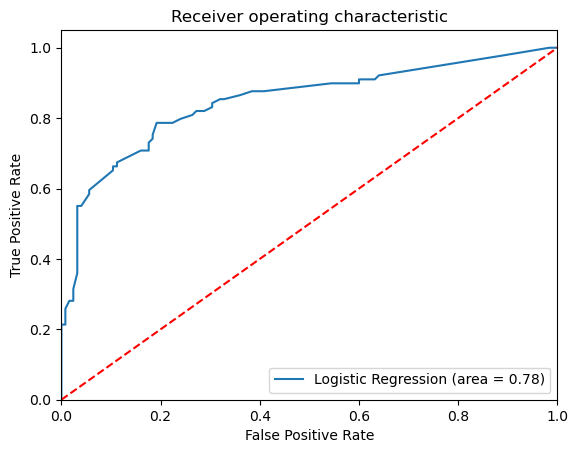

In [2]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
import numpy as np
import scipy.stats
import scipy.special


titanic_df = sns.load_dataset('titanic')
titanic_df['class'] = titanic_df['class'].astype(str)
titanic_df['deck'] = titanic_df['deck'].astype(str)

titanic_df.drop('alive',axis=1,inplace=True)
titanic_df.drop('pclass',axis=1,inplace=True)
titanic_df.drop('embarked',axis=1,inplace=True)

titanic_df.dropna(inplace=True)
titanic_df['alone'] = titanic_df['alone'].apply(lambda row: int(row))
titanic_df['adult_male'] = titanic_df['adult_male'].apply(lambda row: int(row))

cat_cols = ['sex','class','embark_town','who']

y = titanic_df['survived']
# X = titanic_df[['age','fare']].copy()

# X = X.join(titanic_df['sibsp']).join(titanic_df['parch'])

X = titanic_df[['adult_male','alone']]

for col in cat_cols:
    X = X.join(pd.get_dummies(titanic_df[col],drop_first=True, prefix=col))
    
X = X.join(pd.get_dummies(titanic_df['deck']))
X = X.drop('nan',axis=1)
X = sm.add_constant(X)

# Using logistic regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}\n'.format(logreg.score(X_test, y_test)))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(f"\nF1 = {2*((0.82*0.82)/(0.82+0.82))}")

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### OLS regression model

In [3]:
titanic_df = sns.load_dataset('titanic')
titanic_df['class'] = titanic_df['class'].astype(str)
titanic_df['deck'] = titanic_df['deck'].astype(str)

#dropping redudant columns (alive==survived, pclass==class, embarked==embark_town)
titanic_df.drop('alive',axis=1,inplace=True)
titanic_df.drop('pclass',axis=1,inplace=True)
titanic_df.drop('embarked',axis=1,inplace=True)

titanic_df.dropna(inplace=True)
titanic_df['alone'] = titanic_df['alone'].apply(lambda row: int(row))
titanic_df['adult_male'] = titanic_df['adult_male'].apply(lambda row: int(row))

cat_cols = ['sex','class','embark_town','who']

y = titanic_df['survived']
X = titanic_df[['age','fare']].copy()

X = X.join(titanic_df['sibsp']).join(titanic_df['parch'])
X = X.join(titanic_df['adult_male']).join(titanic_df['alone'])

for col in cat_cols:
    X = X.join(pd.get_dummies(titanic_df[col],drop_first=True, prefix=col))

X = X.join(pd.get_dummies(titanic_df['deck']))
X = X.drop('nan',axis=1)
X = sm.add_constant(X)
est = sm.OLS(y,X).fit(cov_type='HC2')

summary = est.summary()
print(f"The mean squared error is: {round(est.mse_model,3)}.")

The mean squared error is: 4.107.


C:\Users\Simona\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 19
  warnings.warn('covariance of constraints does not have full '


## Exercise 2: Intro To Computer Vision

The [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) is a classic in computer vision. It's a database of manually written digits (from 0 to 9) scanned into a 28x28 pixel image.

The `X` matrix is 784 numbers (28x28) with numbers saying how dark the pixel is. The `y` variable is the number. The task is to use the images to do optical recognition.

You can fetch the dataset with the following command:

```
from sklearn.datasets import fetch_openml
fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
```

Use sklearn's logistic regression and any of the tricks you want to boost predictive accuracy. Here's a few notes:

- Use the sklearn `train_test_split` we saw in class to keep some holdout data to test on.
- You can use whatever sklearn preprocessing you think is relevant. Here's a few: 

```
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
```

- Since there's many features (especially if you use data augmentation like polynomial features), this is a good time to use regularization. Try to find the best regularization parameters possible.
- You should be able to get at least 80% on a test set size of 10_000

In [4]:
# exercise 2

from sklearn.datasets import fetch_openml
matrix = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [5]:
np.shape(matrix[0])

(70000, 784)

In [6]:
np.shape(matrix[1])

(70000,)

In [7]:
X = matrix[0]
y = matrix[1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
np.shape(y_train)

(59500,)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

np.shape(X_train_scaled)

(59500, 784)

In [10]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train_scaled, y_train)
print(model.score(X_test_scaled, y_test))

0.9157142857142857


In [11]:
for i in range(30):
    print(y_test[i],model.predict(X_test_scaled[i].reshape(1, -1)))

8 ['8']
4 ['4']
8 ['5']
7 ['7']
7 ['7']
0 ['0']
6 ['6']
2 ['2']
7 ['7']
4 ['7']
3 ['3']
9 ['7']
9 ['9']
8 ['8']
2 ['2']
5 ['5']
9 ['9']
1 ['1']
7 ['7']
8 ['8']
0 ['0']
0 ['0']
0 ['0']
3 ['3']
6 ['6']
3 ['3']
6 ['6']
1 ['1']
6 ['6']
9 ['9']


In [12]:
def reshape(x):
    return x.reshape(1, -1)
    
np.apply_along_axis(reshape, 0, X_test_scaled)
y_predict = model.predict(X_test_scaled)

In [13]:
conf_matrix = confusion_matrix(y_test,y_predict)
print(confusion_matrix(y_test,y_predict))

[[ 988    0    9    1    1   10   15    4    6    1]
 [   0 1174    5    5    2    4    1    4    8    2]
 [   8   15  907   15    7   10   16   13   22    6]
 [   3    8   24  966    2   31    6   15   14   12]
 [   5    1    8    4  896    4    9    6    6   29]
 [   7    7    6   37    9  842   15    2   33   12]
 [   6    6   12    1   10   18  949    3    4    0]
 [   1    2   22    3   11    4    1 1044    1   21]
 [   7   23   15   37    5   34   13    7  860   15]
 [   5    7    4   10   27    4    0   33    8  989]]


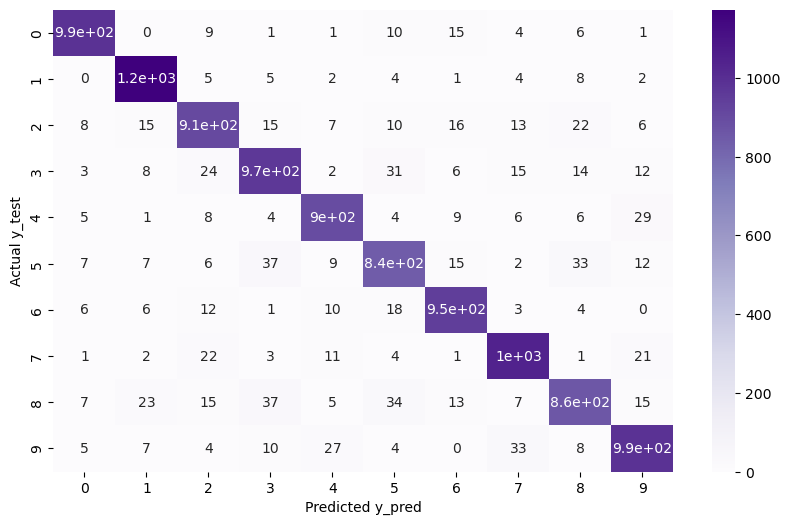

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True,cmap='Purples')
plt.xlabel('Predicted y_pred')
plt.ylabel('Actual y_test')
plt.show()